# Imports

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib

#Get some functions from external file
current_dir = os.getcwd()
os.chdir(r"C:\Users\sjefs\Desktop\AMAS\Functions")     # Direct to external module
import AMAS_functions as AMAS
importlib.reload(AMAS)
os.chdir(current_dir)

# General functions

## Function normalizer

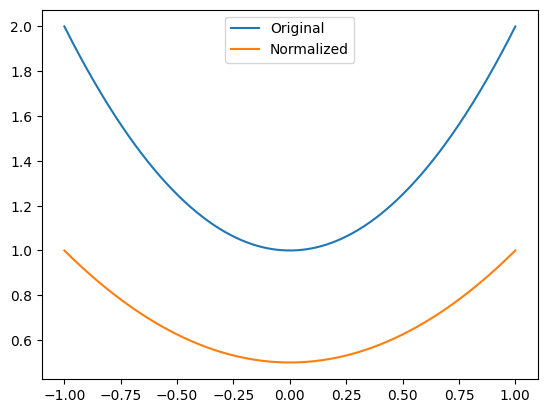

In [197]:
def test_function(x, a, b):
    return a * x**2 + b

##############################################
def normalizer(func, interval = [0, 1], n = 1000, **kwargs):
    """
    Function for numerically normalizing a function.
    Parameters:
        func: function to be normalized
        interval: list of two floats, [a, b], the interval over which to normalize the function
        n: int, number of points to sample the function at
        **kwargs: parameters of the function to be normalized

    Returns:
        function_normalized: function, the normalized function
            The new functions takes a single argument, x, so the parameters of the original function is fixed upon normalization.

    """
    x = np.linspace(interval[0], interval[1], n)
    y = func(x, **kwargs)

    def function_normalized(x):
        return func(x, **kwargs) / max(y)
    
    return function_normalized
##############################################

# Usage example
X = np.linspace(-1, 1, 1000)     
Y = test_function(X, 1, 1)
Y_normalized = normalizer(test_function, interval = [-1, 1], n = 1000, a = 1, b = 1)

plt.plot(X, Y, label = 'Original'), plt.plot(X, Y_normalized(X), label = 'Normalized'), plt.legend(), plt.show()
print("")

## Knot maker

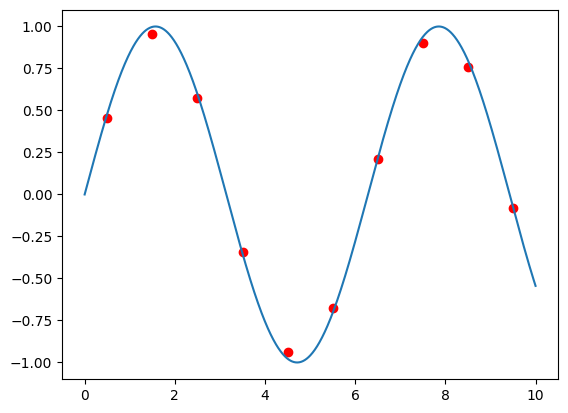

([<matplotlib.lines.Line2D at 0x1a57e3eb750>],
 None)

In [7]:
def knotter(x, y, N = None, knot_length = None):
    """ 
    Function that creates spline knots from data. Can take either the amount of knots, or the length of the knots. 

    Parameters:
        x: np.array, x-values of data
        y: np.array, y-values of data
        N: int, number of knots
        knot_length: float, length of knots
    """
    # Choose between using N or knot_length
    if knot_length == None:
        knot_length = (max(x) - x[0])/N

    # Initialize variables
    max_x = x[0] + knot_length
    result, temp_x, temp_y = [], [], []

    # Run through the data
    for i in range(len(x)):
        # Run through segment
        if x[i] < max_x:
            temp_x.append(x[i])
            temp_y.append(y[i])

        # If segment is done, append mean values to result, and go to next segment
        if x[i] > max_x:
            result.append([np.mean(temp_x), np.mean(temp_y)])
            temp_x = []
            temp_y = []
            max_x = x[i] + knot_length

    # Append last segment
    result.append([np.mean(temp_x), np.mean(temp_y)])


    return np.array(result).T


# Usage example
X = np.linspace(0, 10, 1000)
Y = np.sin(X)
knots = knotter(X, Y, N = 10)
plt.plot(X, Y), plt.scatter(knots[0], knots[1], color = 'red'), plt.show()

## Spline Maker

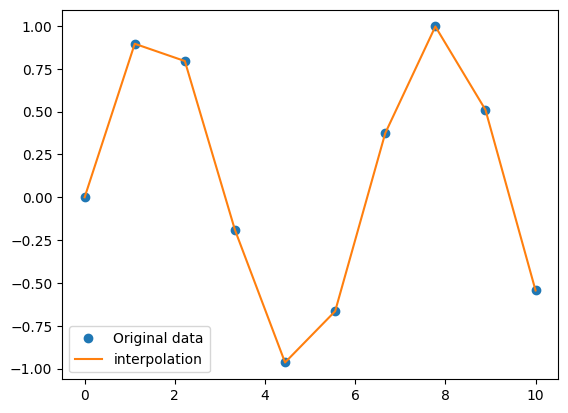

([<matplotlib.lines.Line2D at 0x1a57e2e4b90>],
 None)

In [16]:
def spliner(x, y, N = 10, scale = None):
    """
    Function that creates splines from 1D dataset. 
    You can either specify the number of extra points betwen each datapoint,
    or you can specify a scale factor for the total number of points.

    Parameters:
        x: array, x-values of data
        y: array, y-values of data
        N: int, number of points between each data point
        scale: float, scale factor for the number of points

    Returns:
        result_x, result y: tuple of arrays, x and y values of the spline
    """
    if scale != None:
        N = int(len(x)*scale)
        
    result_y = np.array([])
    result_x = np.array([])
    for i in range(len(x)-1):
        # Get the two points
        x_0, x_1 = x[i], x[i+1]
        y_0, y_1 = y[i], y[i+1]

        # Calculate the slope and the line
        diff_1 = (y_1 - y_0)/(x_1 - x_0)
        x_out = np.linspace(x_0, x_1, N)
        y_out = y_0 + diff_1*(x_out - x_0)

        # Append to the result
        result_x = np.append(result_x, x_out)
        result_y = np.append(result_y, y_out)

    return result_x, result_y


# Usage example
X = np.linspace(0, 10, 10)
Y = np.sin(X)
X_spline, Y_spline = spliner(X, Y, N = 10)
plt.plot(X, Y, 'o', label = "Original data"), plt.plot(X_spline, Y_spline, label = "interpolation"), plt.legend(), plt.show()


# Monte Carlo Functions

## Simple Sampler

17


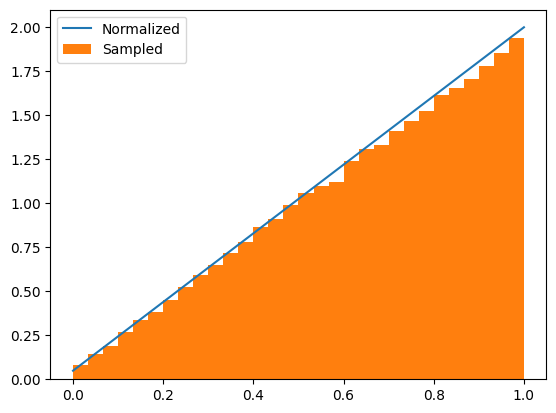

In [420]:
def test_function(x, a, b):
    return a * x + b
if True:
    test_function_normalized = normalizer(test_function, interval = [0, 1], n = 1000, a = 4, b = 0.1)

##################################################
def MC_sampler(func, interval=[0, 1], n_points=1000, **kwargs):
    """
    Function for sampling a function using the Monte Carlo method. 
    Its semi-vectorized, making it very fast compared to a single loop. It makes rougly 22 loop steps at 1.000.000 points

    Parameters:
        func: function to sample
        interval: list of two floats, [a, b], the interval over which to sample the function
        n_points: int, number of points to sample
        **kwargs: parameters of the function to be sampled

    Returns:
        points: array of floats, the sampled points
    """
    count = 0
    n_step = n_points
    output = np.array([])
    while len(output) < n_points:
        x = np.random.uniform(interval[0], interval[1], n_step)
        y = np.random.uniform(0, 1, n_step)
        output = np.append(output, x[y < func(x, **kwargs)])
        n_step = n_points - len(output)
        count += 1

    print(count)
    return output
##################################################
# Usage example
samples = MC_sampler(test_function_normalized, interval = [0, 1], n_points = 100000)
X = np.linspace(0, 1, 1000)
Y = test_function_normalized(X)*2          #some factor to make it comparable to the histogram

plt.plot(X, Y, label = 'Normalized'), plt.hist(samples, bins = 30, density = True, label = 'Sampled'), plt.legend(), plt.show()
print("")

# Expressions

In [249]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import importlib

#Get some functions from external file
current_dir = os.getcwd()
os.chdir(r"C:\Users\sjefs\Desktop\AMAS\Functions")     # Direct to external module
import AMAS_functions as AMAS
importlib.reload(AMAS)
os.chdir(current_dir)

0.0 4.792146263274957e-110 1.6316896591277261e-65


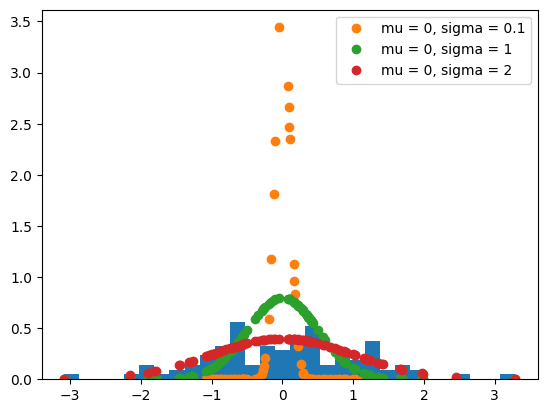

In [374]:

data = np.random.normal(0, 1, 100)
plt.hist(data, bins = 30, density = True)
test_0 = AMAS.gaussian(data, 0, 0.1)
test_1 = AMAS.gaussian(data, 0, 0.5)
test_2 = AMAS.gaussian(data, 0, 1)
plt.plot(data, test_0, 'o', label = 'mu = 0, sigma = 0.1')
plt.plot(data, test_1, 'o', label = 'mu = 0, sigma = 1')
plt.plot(data, test_2, 'o', label = 'mu = 0, sigma = 2')
plt.legend()

L_0 = AMAS.likelihood(AMAS.gaussian, data, mu = 0, sigma = 0.1)
L_1 = AMAS.likelihood(AMAS.gaussian, data, mu = 0, sigma = 0.5)
L_2 = AMAS.likelihood(AMAS.gaussian, data, mu = 0, sigma = 1)
print(L_0, L_1, L_2)



In [ ]:
def ln_likelihood(func, data, **kwargs):
    return np.sum(np.log(func(data, **kwargs)))

# Likelihoods

## Rastor Scan

7



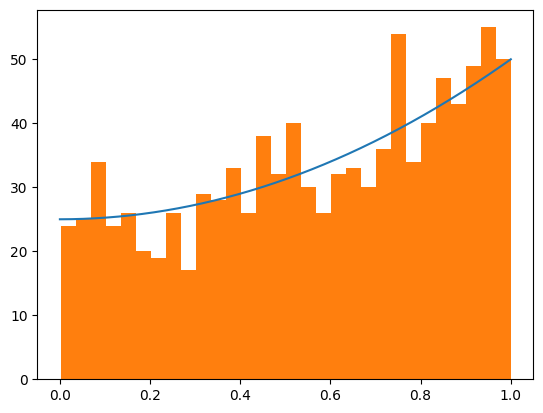

In [430]:
def test_function(x, a, b):
    return a * x**2 + b

test_function = AMAS.normalizer(test_function, interval = [0, 1], n = 1000, a = 1, b = 1)
n_points = 1000
data = AMAS.MC_sampler(test_function, interval = [0, 1], n_points = n_points)
X = np.linspace(0, 1, 1000)
Y = test_function(X)*n_points/10/2          #some factor to make it comparable to the histogram
plt.plot(X, Y, label = 'Normalized')
plt.hist(data, bins = 30, density = False, label = 'Sampled')
print("")


def rastor_scan(func, data, test_interval = [-10, 10], n_points = 100, **kwargs):
    None